                      Understanding Image via Operations

In [1]:
#Importing all the initially required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

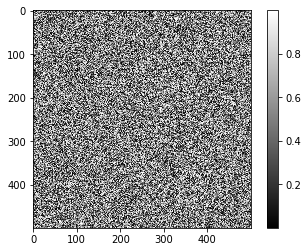

In [2]:
#Generating a grayscale image of dimension(500,500)
random_image = np.random.random([500,500])
plt.imshow(random_image,cmap="gray")
plt.colorbar()

<class 'numpy.ndarray'>
uint8
(303, 384)


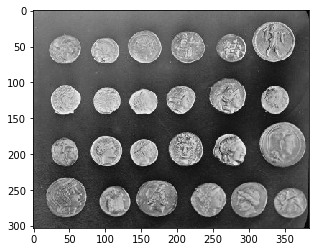

In [3]:
#Image from skimage data
from skimage import data
coins = data.coins()
plt.imshow(coins,cmap ="gray")
#The attraibutes of coin images(basically this way we can show the attributes of any image whatever be the color space)

#What kind of python object
print(type(coins))
#Datatype odf image
print(coins.dtype)
#Dimension of the Image
print(coins.shape)

In [4]:
pwd

'/home/bluebrain/Desktop/image analysis'

uint8
(448, 640, 3)
<class 'numpy.ndarray'>


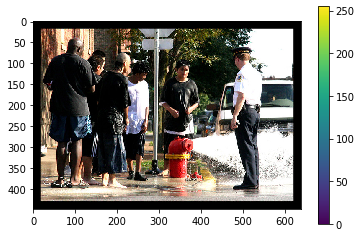

In [5]:
#Showing a color image and its attributes(Color image have 3 channels-red,green,blue)
from skimage import io
image = io.imread("/home/bluebrain/Desktop/image analysis/images/1045023827_4ec3e8ba5c_z.jpg")
plt.imshow(image)
plt.colorbar()
#The attributes of image
print(image.dtype)
print(image.shape)
print(type(image))

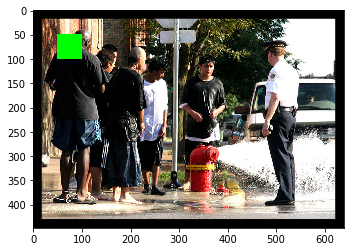

In [6]:
#Playing with the image(changing the value of the numpy array in certaing regions)
image[50:100,50:100,:] = [0,255,0]
plt.imshow(image)

Text(0, 0.5, 'ln')

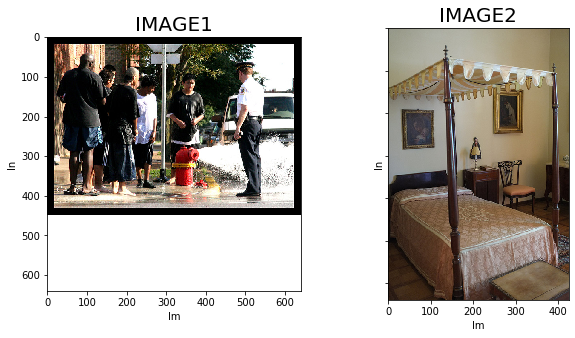

In [7]:
#Displaying images using matplotlib
image1 = io.imread("/home/bluebrain/Desktop/image analysis/images/1045023827_4ec3e8ba5c_z.jpg")
image2 = io.imread("/home/bluebrain/Desktop/image analysis/images/7581246086_cf7bbb7255_z.jpg")
f, (ax1, ax2) = plt.subplots(1, 2,figsize = (10,5),sharey=True)

ax1.imshow(image1)
ax1.set_title("IMAGE1",fontsize = 20)
ax1.set_xlabel("lm")
ax1.set_ylabel("ln")
ax2.imshow(image2)
ax2.set_title("IMAGE2",fontsize = 20)
ax2.set_xlabel("lm")
ax2.set_ylabel("ln")

0 255
0.0 1.0


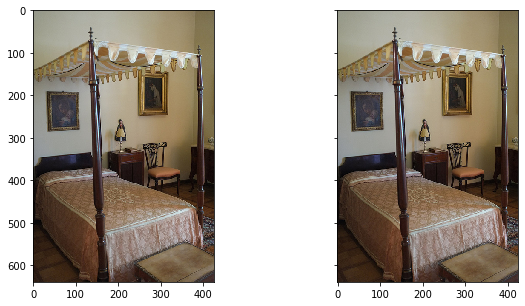

In [8]:
#We can convert image between different representations using img_as_float and img_as_ubyte
from skimage import img_as_float,img_as_ubyte

image = io.imread("/home/bluebrain/Desktop/image analysis/images/7581246086_cf7bbb7255_z.jpg")

f,(ax1,ax2) = plt.subplots(1,2,figsize = (10,5),sharey = True)

#Image has pixel value between 0 to 255
image_ubyte = img_as_ubyte(image)
#Printing max and min values in image_ubyte
print(image_ubyte.min(),image_ubyte.max())
ax1.imshow(image_ubyte)


#converting image to such that now it has pixel values between 0 and 1(floating numbers)
image_float = img_as_float(image)
#Printing max and min of image_float
print(image_float.min(),image_float.max())
ax2.imshow(image_float)

In [9]:
#Here we can also load multiple images or multi layer tiff images(insted we can also use for loop for loading multiple images)
image_group = io.ImageCollection("/home/bluebrain/Desktop/image analysis/images/*.jpg:/home/bluebrain/Desktop/image analysis/images/*.png")
image_group.files

['/home/bluebrain/Desktop/image analysis/images/12283150_12d37e6389_z.jpg',
 '/home/bluebrain/Desktop/image analysis/images/25691390_f9944f61b5_z.jpg',
 '/home/bluebrain/Desktop/image analysis/images/262985539_1709e54576_z.jpg',
 '/home/bluebrain/Desktop/image analysis/images/1045023827_4ec3e8ba5c_z.jpg',
 '/home/bluebrain/Desktop/image analysis/images/2383514521_1fc8d7b0de_z.jpg',
 '/home/bluebrain/Desktop/image analysis/images/2502287818_41e4b0c4fb_z.jpg',
 '/home/bluebrain/Desktop/image analysis/images/2516944023_d00345997d_z.jpg',
 '/home/bluebrain/Desktop/image analysis/images/3132016470_c27baa00e8_z.jpg',
 '/home/bluebrain/Desktop/image analysis/images/3627527276_6fe8cd9bfe_z.jpg',
 '/home/bluebrain/Desktop/image analysis/images/3651581213_f81963d1dd_z.jpg',
 '/home/bluebrain/Desktop/image analysis/images/3800883468_12af3c0b50_z.jpg',
 '/home/bluebrain/Desktop/image analysis/images/3862500489_6fd195d183_z.jpg',
 '/home/bluebrain/Desktop/image analysis/images/3878153025_8fde829928

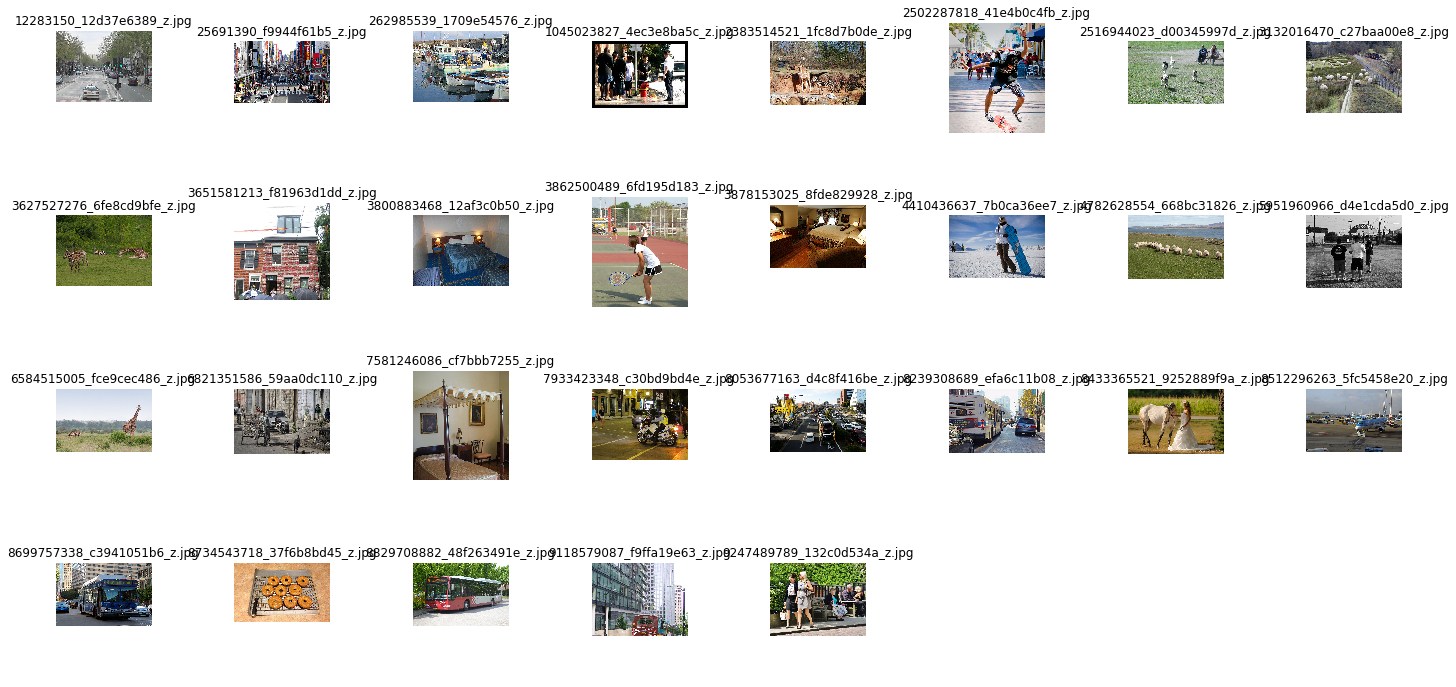

In [10]:
#Showing all the images in a folder
import os
f,axes = plt.subplots(nrows = 4,ncols=len(image_group)//4+1,figsize = (20,10),sharey = True)
#For turning it into list
axes = axes.ravel()
for ax in axes:
    ax.axis("off")
for i,image in enumerate(image_group):
    axes[i].imshow(image)
    axes[i].set_title(os.path.basename(image_group.files[i]))
plt.tight_layout()

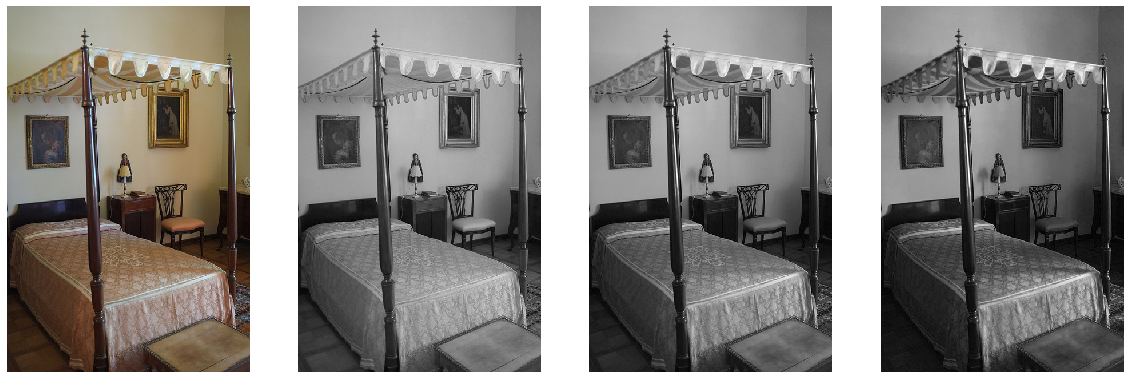

In [11]:
#Visualizing the rgb channels of a image
image = io.imread("/home/bluebrain/Desktop/image analysis/images/7581246086_cf7bbb7255_z.jpg")
f,axes = plt.subplots(1,4,figsize = (20,10),sharey = True)
axes = axes.ravel()

red_channel = image[:,:,0]
green_channel = image[:,:,1]
blue_channel = image[:,:,2]

for ax in axes:
    ax.axis("off")

j = [image,red_channel,green_channel,blue_channel]
for i,p in enumerate(j):
    axes[i].imshow(p,cmap = "gray")
#We can also stack channels using np.stack[r,g,b] and also the axis either 1 or 2

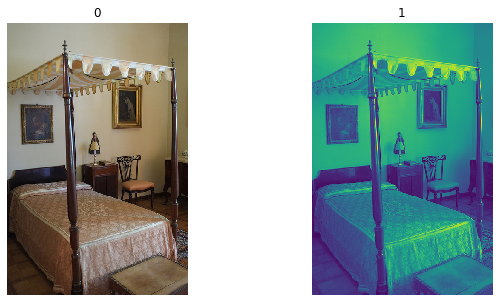

In [12]:
#Converting a image from rgb to gray scale
#gray_image = [red_channel*0.2126,green_channel*0.7152,blue_channel*0,0722]
#All these chabnnels are from the color image
image = io.imread("/home/bluebrain/Desktop/image analysis/images/7581246086_cf7bbb7255_z.jpg")
gray_scale_image = image @ [0.2126,0.7152,0.0722]
f,axes = plt.subplots(1,2,figsize = (10,5),sharey = True)
axes = axes.ravel()
for ax in axes:
    ax.axis("off")
    
image_list=[image,gray_scale_image]
for i,image in enumerate(image_list):
    axes[i].imshow(image)
    axes[i].set_title(i)

                                   Image Filtering
Filtering is usually done with a intention of improving the quality of image(enhancing its features)

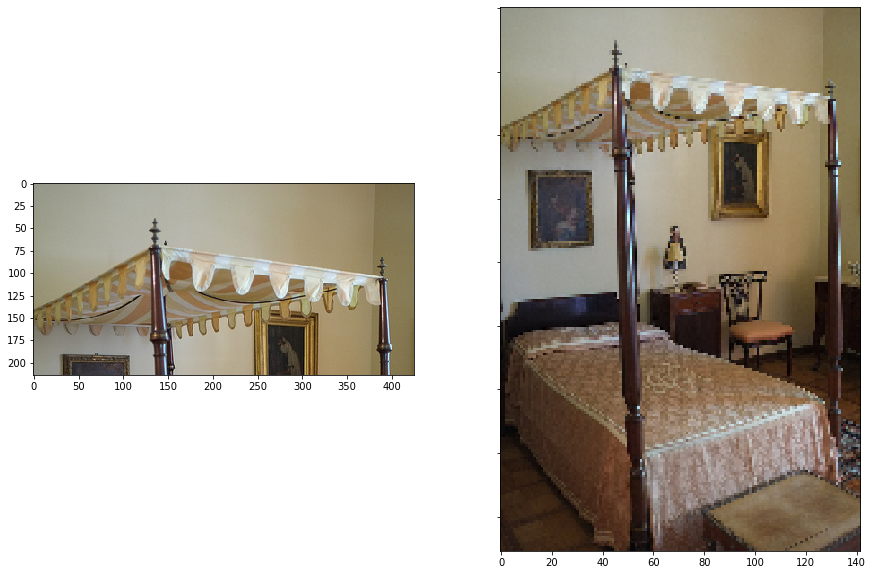

In [17]:
#Downsampling the image
image = io.imread("/home/bluebrain/Desktop/image analysis/images/7581246086_cf7bbb7255_z.jpg")
pixelated = image[::3,::3]
#It basically gives every 3rd row and every 3rd column of image
f, (ax1,ax2)= plt.subplots(1,2,figsize = (15,10),sharey = True)
ax1.imshow(image)
ax2.imshow(pixelated)

In [ ]:
#Denoising a image
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, img_as_float
from skimage.restoration import denoise_tv_chambolle, denoise_bilateral


lena = img_as_float(data.lena())
lena = lena[220:300, 220:320]

noisy = lena + 0.6 * lena.std() * np.random.random(lena.shape)
noisy = np.clip(noisy, 0, 1)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(8, 5))

plt.gray()

ax[0, 0].imshow(noisy)
ax[0, 0].axis('off')
ax[0, 0].set_title('noisy')
ax[0, 1].imshow(denoise_tv_chambolle(noisy, weight=0.1, multichannel=True))
ax[0, 1].axis('off')
ax[0, 1].set_title('TV')
ax[0, 2].imshow(denoise_bilateral(noisy, sigma_range=0.05, sigma_spatial=15))
ax[0, 2].axis('off')
ax[0, 2].set_title('Bilateral')

ax[1, 0].imshow(denoise_tv_chambolle(noisy, weight=0.2, multichannel=True))
ax[1, 0].axis('off')
ax[1, 0].set_title('(more) TV')
ax[1, 1].imshow(denoise_bilateral(noisy, sigma_range=0.1, sigma_spatial=15))
ax[1, 1].axis('off')
ax[1, 1].set_title('(more) Bilateral')
ax[1, 2].imshow(lena)
ax[1, 2].axis('off')
ax[1, 2].set_title('original')

fig.subplots_adjust(wspace=0.02, hspace=0.2,
                    top=0.9, bottom=0.05, left=0, right=1)
plt.show()